In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('task2_data.csv')
a = df.iloc[:,1].values
a = list(set(a))
a.sort()

In [49]:
df.shape

(55732, 8)

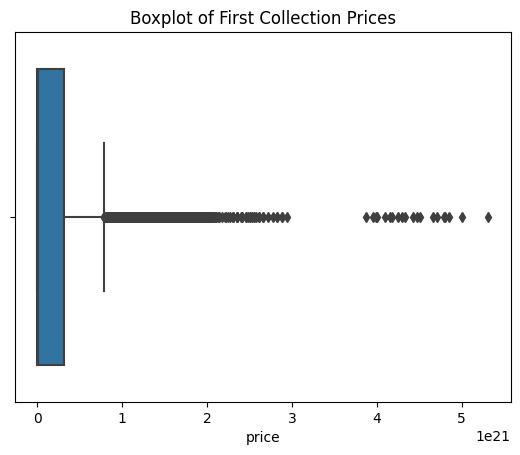

In [50]:
df1 = df[df['collection_address'] == a[0]]
df2 = df[df['collection_address'] == a[1]]

sns.boxplot(data=df1,x=df1["price"])
plt.title("Boxplot of First Collection Prices")
plt.show()

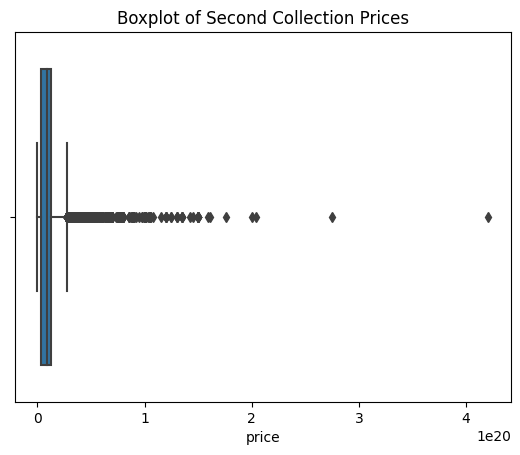

In [51]:
sns.boxplot(data=df2,x=df2["price"])
plt.title("Boxplot of Second Collection Prices")
plt.show()

In [52]:
Q1 = df1["price"].quantile(0.25)
Q3 = df1["price"].quantile(0.75)
IQR = Q3-Q1

ul1 = Q3+1.5*IQR
ll1 = Q1-1.5*IQR

Q1 = df2["price"].quantile(0.25)
Q3 = df2["price"].quantile(0.75)
IQR = Q3-Q1

ul2 = Q3+1.5*IQR
ll2 = Q1-1.5*IQR

In [53]:
print(f"upper limit and lower limit for Collection 1 are {ul1}, {ll1}")
print(f"upper limit and lower limit for Collection 2 are {ul2}, {ll2}")

upper limit and lower limit for Collection 1 are 7.848675000000001e+20, -4.7024850000000005e+20
upper limit and lower limit for Collection 2 are 2.7715e+19, -1.1525e+19


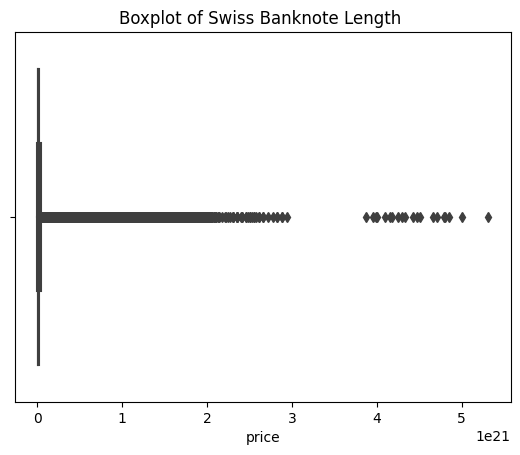

In [54]:
sns.boxplot(data=df,x=df["price"])
plt.title("Boxplot of Swiss Banknote Length ")
plt.show()

In [55]:
outliers = df[(((df["collection_address"] == a[0]) & ((df["price"]<(ll1)) | (df["price"]>(ul1)))) | ((df["collection_address"] == a[1]) & ((df["price"]<(ll2)) | (df["price"]>(ul2)))) | (df["price"] == 0 ))]
print(df.shape,outliers.shape)

(55732, 8) (2273, 8)


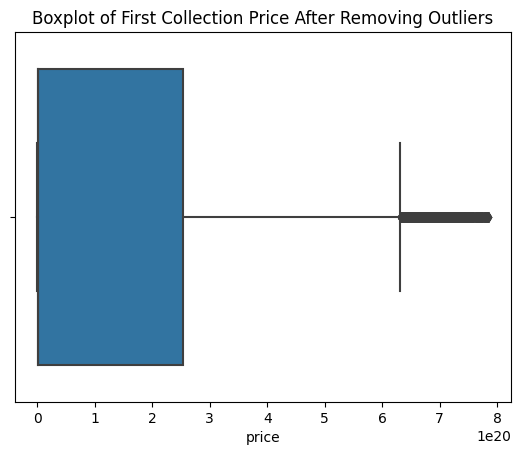

In [56]:
df1 = df1[~((df1["price"]<(ll1)) | (df1["price"]>(ul1))) & (df1["price"] != 0)]

sns.boxplot(data=df1,x=df1["price"])
plt.title("Boxplot of First Collection Price After Removing Outliers")
plt.show()

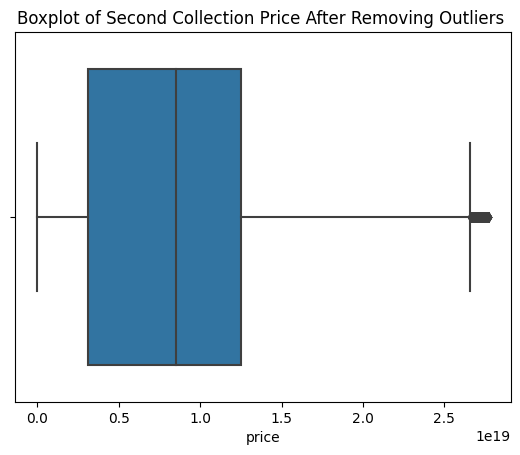

In [57]:
df2 = df2[~((df2["price"]<(ll2)) | (df2["price"]>(ul2))) & (df2["price"] != 0)]

sns.boxplot(data=df2,x=df2["price"])
plt.title("Boxplot of Second Collection Price After Removing Outliers ")
plt.show()

In [58]:
outliers = df[(((df["collection_address"] == a[0]) & ((df["price"]<(ll1)) | (df["price"]>(ul1)))) | ((df["collection_address"] == a[1]) & ((df["price"]<(ll2)) | (df["price"]>(ul2)))) | (df["price"] == 0 ))]

outliers.sample(5)

,Unnamed: 0,collection_address,event_type,marketplace_name,timestamp,token_id,price,payment_symbol
43517,43517,0xed5af388653567af2f388e6224dc7c4b3241c544,sale,opensea,1648919848,3855,3.200000e+19,ETH
22539,22539,0x4e1f41613c9084fdb9e34e11fae9412427480e56,sale,looksrare,1661161077,5283,1.010000e+21,WETH
13134,13134,0x4e1f41613c9084fdb9e34e11fae9412427480e56,sale,looksrare,1642807036,2118,8.880000e+20,WETH
6800,6800,0xed5af388653567af2f388e6224dc7c4b3241c544,sale,looksrare,1649957194,3301,4.669000e+19,WETH
2024,2024,0xed5af388653567af2f388e6224dc7c4b3241c544,sale,opensea,1648845357,4095,2.800000e+19,ETH


In [59]:
outliers.shape

(2273, 8)